In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

In [7]:
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)
display(df.head())
print(df.info())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [8]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [9]:
print(f"Valores Nulos:\n{df.isnull().sum()}")
print(f"\nDuplicados: {df.duplicated().sum()}")

Valores Nulos:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Duplicados: 1


In [10]:
df.drop_duplicates(inplace=True)

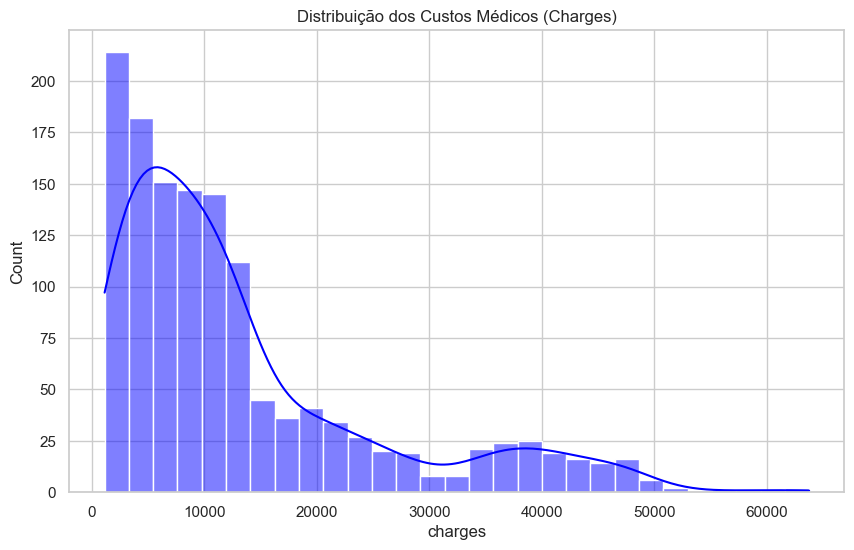

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df['charges'], kde=True, color='blue')
plt.title('Distribuição dos Custos Médicos (Charges)')
plt.show()

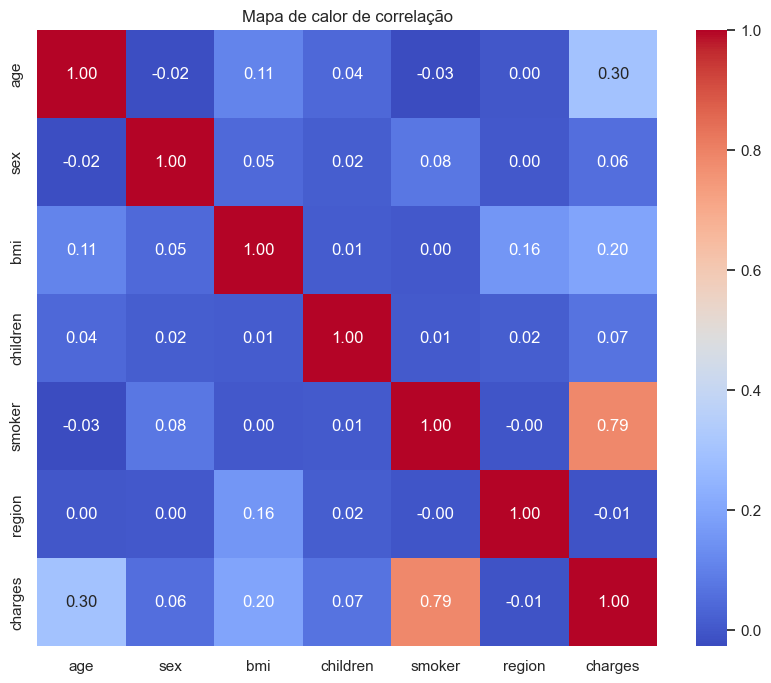

In [12]:
df_corr = df.copy()
for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col] = df_corr[col].astype('category').cat.codes

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlação')
plt.show()

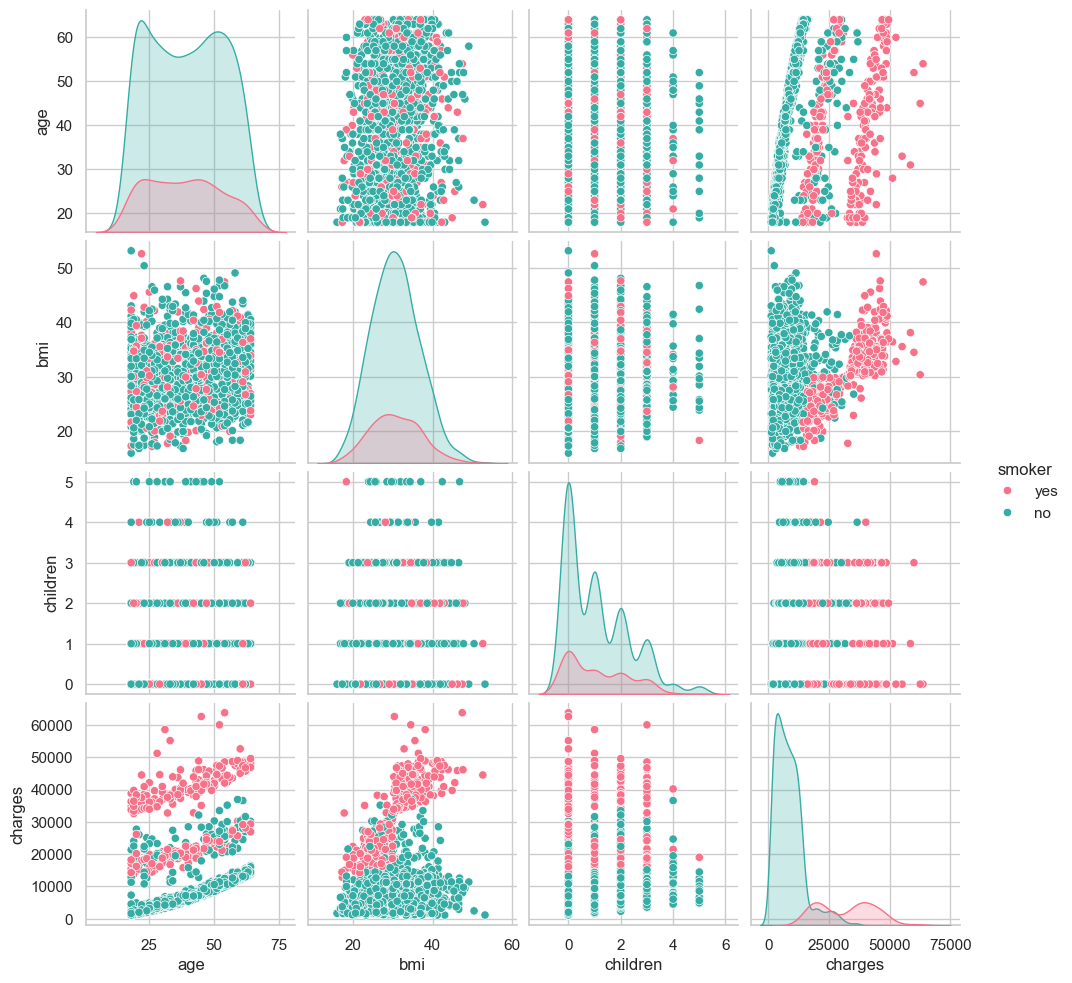

In [13]:
sns.pairplot(df, hue='smoker', palette='husl')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
display(df_encoded.head())
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamanho do treino: {X_train.shape}')
print(f'Tamanho do teste: {X_test.shape}')

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


Tamanho do treino: (1069, 8)
Tamanho do teste: (268, 8)


In [17]:
import statsmodels.api as sm

In [26]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

X_train_sm = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train, X_train_sm).fit()
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     358.1
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          4.94e-295
Time:                        21:25:59   Log-Likelihood:                -10831.
No. Observations:                1069   AIC:                         2.168e+04
Df Residuals:                    1060   BIC:                         2.172e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.109e+04   1114.260  

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred_poly = poly_reg.predict(X_test_poly)

print("--- Resultados Preliminares (R²) ---")
print(f"Linear Múltipla R²: {r2_score(y_test, y_pred_lr):.2f}")
print(f"Polinomial (grau 2) R²: {r2_score(y_test, y_pred_poly):.2f}")

--- Resultados Preliminares (R²) ---
Linear Múltipla R²: 0.81
Polinomial (grau 2) R²: 0.88
